In [8]:
# STEP 1: Install the Google Generative AI SDK
!pip install -q google-generativeai

In [9]:
import os
os.environ["GOOGLE_API_KEY"] = "ENTER API KEY"


#IMAGE UNDERSTANDING



In [10]:
# Gemini models are built to be multimodal from the ground up, unlocking a wide range of image processing and computer vision tasks,
# without having to train specialized ML models.


# Think of it like giving the AI eyes — it can look at a picture and:
#       Describe it in words (image captioning)
#       Answer questions about it (visual Q&A)
#       Find & locate objects, image labelling.
#       Read text in images (OCR)
#       Compare images (find differences, similarities)
#       Extract data (like reading numbers, charts, forms)

In [11]:
#  Describe it in words
from google import genai
from google.genai import types
from PIL import Image    # TO IMPORT IMAGE


client = genai.Client()


image = Image.open("/content/cat_dog_image.png")

prompt ="Give me an caption for the image"
# Generate a caption for  the given image using the Gemini model
response= client.models.generate_content(
    model= "gemini-2.5-flash",
    contents=[image, prompt]  # Provide the image and the description prompt
    )
# print the generated one - sentence image description
print(response.text)

Here are a few caption options for the image:

**Short & Sweet:**
*   Furry friends.
*   Cat and dog companions.
*   The perfect pair.
*   Animal buddies.
*   Pure pet cuteness.

**Descriptive:**
*   A cute cat and dog sitting together, looking like the best of friends.
*   An adorable illustration of a friendly ginger cat and a tan dog with a spot.
*   Two happy animal companions, a cat and a dog, in a simple and charming style.

**Emphasizing Friendship/Harmony:**
*   Proof that cats and dogs can be the best of pals!
*   Best friends forever, feline and canine edition.
*   Living in purrfect harmony (and woof-derful friendship!).
*   The ultimate duo of furry companionship.

**Playful:**
*   Who says cats and dogs can't be friends?
*   Ready for adventures together!
*   Pawsitively the best of friends!

Choose the one that best fits the context where you'll be using it!


In [12]:

#  Describe it in words
from google import genai
from google.genai import types
from PIL import Image    # TO IMPORT IMAGE


client = genai.Client()


image = Image.open("/content/cat_dog_image.png")

prompt ="describe this image in one sentence"

response_1= client.models.generate_content(
    model= "gemini-2.5-flash",
    contents=[image, prompt]
    )

print(response_1.text)

A friendly cartoon illustration depicts an orange tabby cat and a brown dog with a spot sitting side-by-side on a light beige background.


In [13]:
#       Compare images (find differences, similarities)

image = Image.open("/content/cat_dog.png")
image2=  Image.open("/content/cat_dog_image.png")
prompt ="What is the difference between both the images."

response_2= client.models.generate_content(
    model= "gemini-2.5-flash",
    contents=[image, image2, prompt]
    )

print(response_2.text)

The main differences between the two images are in their **style, realism, and presence of text**.

Here's a breakdown:

1.  **Style/Artistic Medium:**
    *   **Image 1:** Is a **photograph** of real-life animals.
    *   **Image 2:** Is an **illustration** or **cartoon** drawing of animals.

2.  **Realism:**
    *   **Image 1:** Features highly **realistic** depictions of a cat and a dog, showing natural textures (fur), detailed eyes, and natural proportions.
    *   **Image 2:** Features highly **stylized** and simplified characters with exaggerated features (large heads, simple bodies), often seen in children's media.

3.  **Text:**
    *   **Image 1:** Includes the text "**CAT AND DOG**" prominently at the top.
    *   **Image 2:** Contains **no text**.

4.  **Level of Detail:**
    *   **Image 1:** Shows fine details like individual whiskers, variations in fur color, and reflections in the eyes.
    *   **Image 2:** Uses smooth lines, solid colors, and simplified shapes, with min

In [14]:
#  size of image
from google import genai
from google.genai import types
from PIL import Image    # TO IMPORT IMAGE


client = genai.Client()


image = Image.open("/content/cat_dog_image.png")
print(image.size)


(1536, 1024)


In [15]:
#  Read text in images (OCR)
client = genai.Client()
image2=  Image.open("/content/cat_dog.png")
W,H= image2.size
prompt ="""Find all  main objects  in the image,
           For each object , return JSON:
           {"label":".....","box_2d":[ymin, xmin, ymax, xmax]}scaled to 0-1000
     """
# LLM apko pixel mei answer dega
# so we want output in JSON form



response_3= client.models.generate_content(
    model= "gemini-2.5-flash",
    contents=[image2, prompt],
    config={"response_mime_type":"application/json"}    # how i want my output
    )

print(response_3.text)

[
  {"label": "cat", "box_2d": [245, 0, 1000, 470]},
  {"label": "dog", "box_2d": [238, 439, 1000, 998]},
  {"label": "cat and dog", "box_2d": [53, 127, 175, 874]}
]


In [16]:
import json
from IPython.display  import display

object = json.loads(response_3.text)

In [17]:
from PIL import Image, ImageDraw, ImageFont
draw= ImageDraw.Draw(image2) # add canvas
font= ImageFont.load_default() # add labels

In [18]:
object

[{'label': 'cat', 'box_2d': [245, 0, 1000, 470]},
 {'label': 'dog', 'box_2d': [238, 439, 1000, 998]},
 {'label': 'cat and dog', 'box_2d': [53, 127, 175, 874]}]

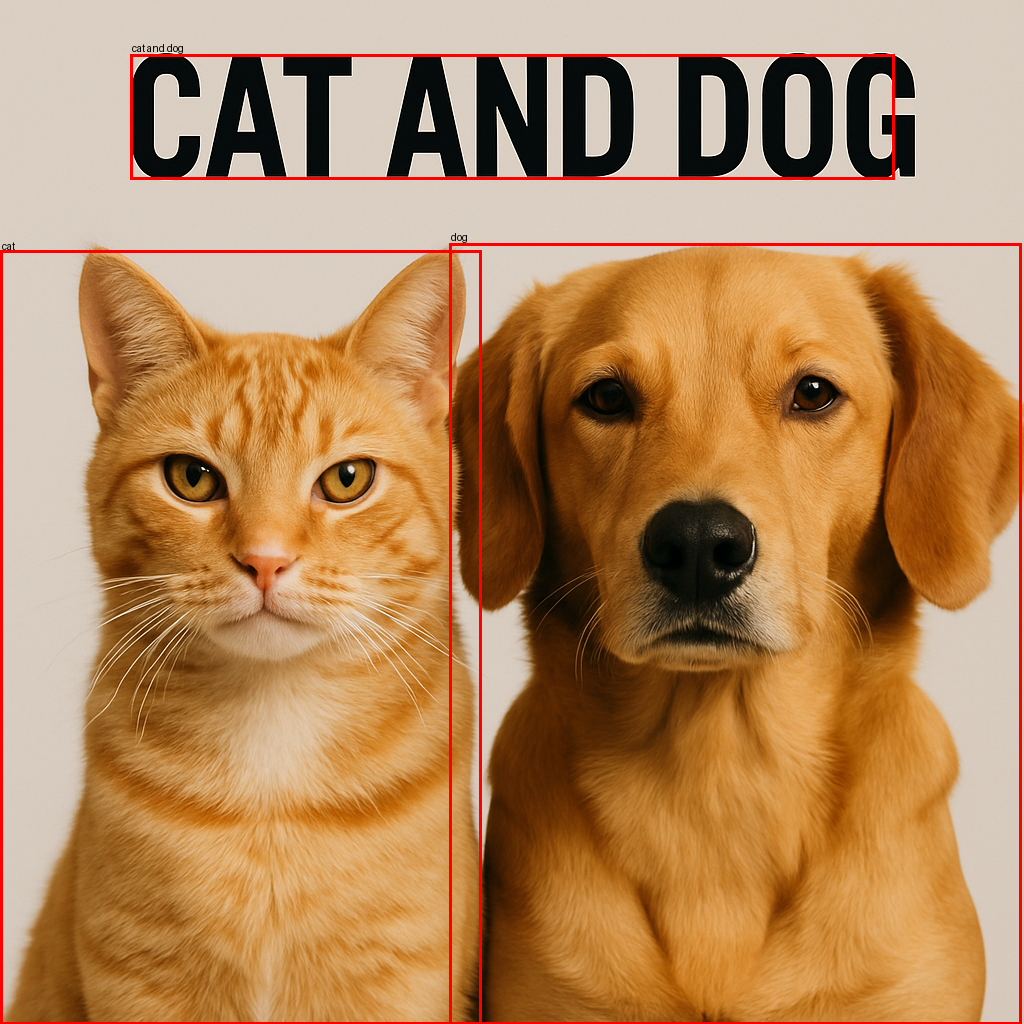

In [19]:
for obj in object:
  label= obj["label"]
  ymin, xmin, ymax, xmax = obj["box_2d"]

  x1, y1 = int(xmin / 1000 * W), int(ymin / 1000 * H)
  x2, y2 = int(xmax / 1000 * W), int(ymax / 1000 * H)

  # draw rectangle
  draw.rectangle([x1,y1,x2,y2], outline="Red", width=3)

  # Get text size
  bbox = draw.textbbox((x1, y1), label, font=font)
  th = bbox[3] - bbox[1]

  #label
  draw.text((x1 + 2, y1 - th - 2), label, fill="black", font=font)

display(image2)